In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='Latin-1')

In [4]:
# Display the first few rows of the dataset
print(df.head(2))

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
0        10107               30      95.70                2  2871.0   
1        10121               34      81.35                5  2765.9   

        ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2/24/2003 0:00  Shipped       1         2     2003  ...   
1   5/7/2003 0:00  Shipped       2         5     2003  ...   

              ADDRESSLINE1  ADDRESSLINE2   CITY STATE POSTALCODE COUNTRY  \
0  897 Long Airport Avenue           NaN    NYC    NY      10022     USA   
1       59 rue de l'Abbaye           NaN  Reims   NaN      51100  France   

  TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0       NaN              Yu             Kwai    Small  
1      EMEA         Henriot             Paul    Small  

[2 rows x 25 columns]


In [5]:
# Step 1: Data Preprocessing
# Select relevant numerical columns for clustering
numeric_columns = [
    'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'
]

In [6]:
# Drop any rows with missing values in these columns
df = df[numeric_columns].dropna()

In [7]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
# Step 2: Determine the number of clusters using the Elbow Method
# Range for potential number of clusters
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

C:\Users\HP\AppData\Local\Temp\ipykernel_19728\3335493284.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, inertia, 'bo-', color='blue')


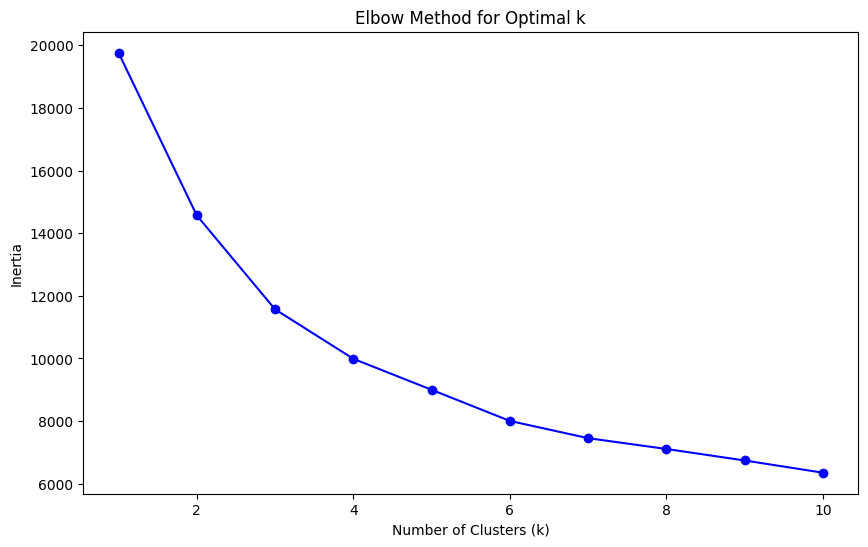

In [12]:
# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
# Step 3: Apply K-Means with the optimal number of clusters (based on elbow method observation)
# Assuming the optimal number of clusters found is 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [14]:
# Step 4: Hierarchical Clustering (optional)
# Generate linkage matrix for hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

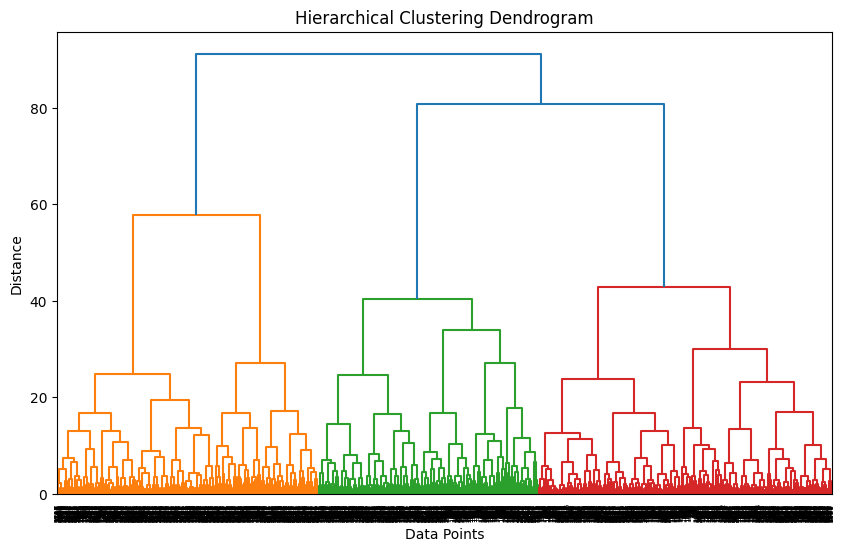

In [15]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [16]:
# Save the clustered data to a new CSV file (optional)
df.to_csv('sales_data_clustered.csv', index=False)
print("Clustering completed and saved to 'sales_data_clustered.csv'")

Clustering completed and saved to 'sales_data_clustered.csv'
